In [10]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [17]:
plt.rc('font', size=24)          # controls default text sizes
plt.rc('axes', titlesize=24)     # fontsize of the axes title
#plt.rc('axes', titleweight="bold")     # fontweight of the axes title
plt.rc('axes', labelsize=24)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=24)    # fontsize of the tick labels
plt.rc('ytick', labelsize=24)    # fontsize of the tick labels

In [4]:
graphNames = ["AutonomousSystems", 
              "ca-HepTh", 
              "Facebook", 
              "LastFM", 
              "protein-protein",
              "wikipedia"]
algNames = ["HGCN",
            "HOPE",
            "LaplacianEigenmap",
            "Node2Vec", 
            "SDNE", 
            "SVD"]

In [12]:
def get_xy(embeddings_list, d):
    '''
    Get the 2D projection for the node embedddings. embeddings_list is a np.array
    '''
    assert(type(embeddings_list) == np.ndarray)
    
    if d > 2:
        #embeddings_list = TSNE(n_components=2, n_jobs=-1).fit_transform(embeddings_list)
        embeddings_list = PCA(n_components=2).fit_transform(embeddings_list)
    x = embeddings_list[:, 0]
    y = embeddings_list[:, 1]
    return x,y

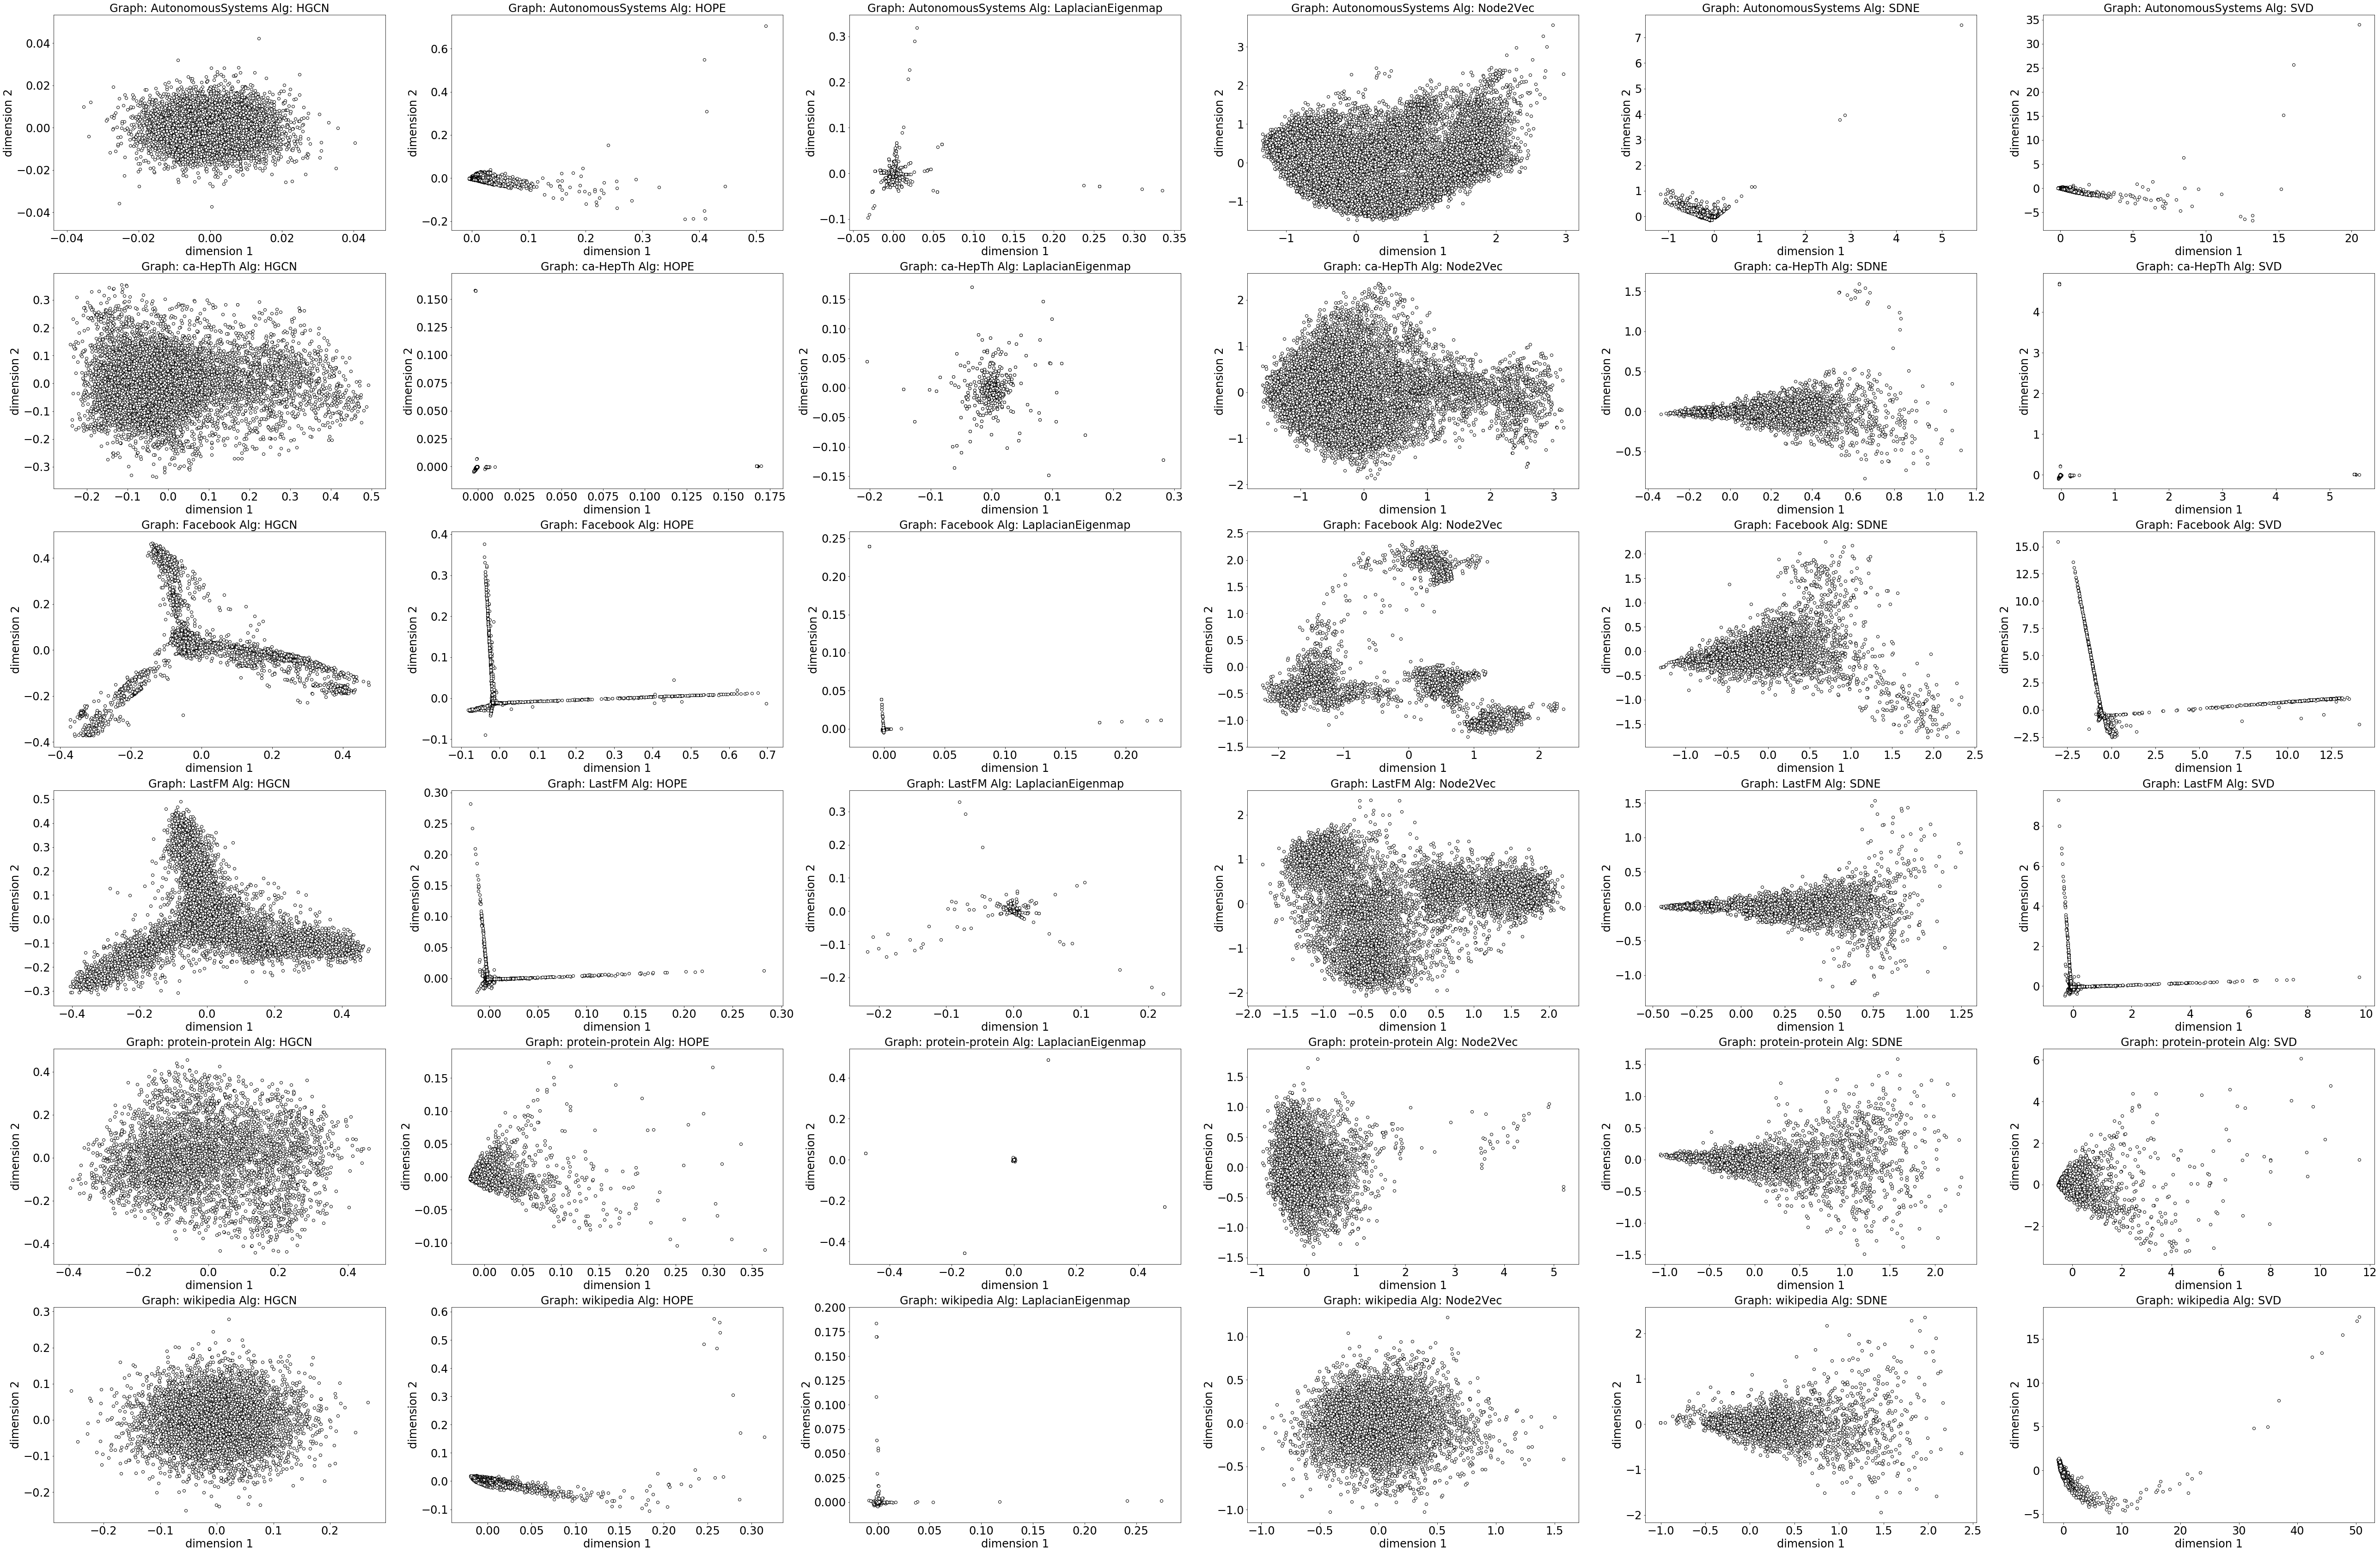

In [18]:
fig, axs = plt.subplots(ncols=len(algNames), nrows=len(graphNames), figsize=(15*len(algNames), 10*len(graphNames)))
for r in range(len(graphNames)):
    graphName = graphNames[r]
    for c in range(len(algNames)):
        algName = algNames[c]
        filename = "embeddings/{}/{}/{}_{}_64_embedding.npy".format(graphName, algName, graphName, algName)
        embeddings = np.load(filename)
        x,y = get_xy(embeddings, 64)
        axs[r][c].scatter(x, y, c="white", edgecolors="black")
        axs[r][c].set_title("Graph: {} Alg: {}".format(graphName, algName))
        axs[r][c].set_xlabel("dimension 1")
        axs[r][c].set_ylabel("dimension 2")